<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab05_kernel_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5 - Kernel Methods
### Author: Szymon Nowakowski


# Introduction to Kernel Methods  
-----------------------  

Kernel methods are a class of machine learning techniques that enable models to capture complex relationships in data by mapping inputs into high-dimensional feature spaces. Instead of working directly with raw features, kernel methods rely on kernel functions that compute inner products in these transformed spaces, allowing models to discover nonlinear patterns while avoiding explicit feature transformations.  

The fundamental idea behind kernel methods is to leverage the **kernel trick**, which replaces explicit high-dimensional computations with efficient similarity measurements. This approach is particularly useful in algorithms like **Support Vector Machines (SVMs)**, **kernel regression**, and **Gaussian processes**, where the goal is to find decision boundaries or make predictions in feature spaces that may be infeasible to compute directly.  

Kernel methods are crucial for problems where linear models fail to capture the underlying structure, enabling flexible, nonlinear decision functions without excessive computational cost. They also provide a principled framework for incorporating domain knowledge through custom kernel functions, making them widely applicable across diverse fields such as bioinformatics, computer vision, and natural language processing.


# Support Vector Machines (SVMs) and Margin Boundaries for Separable Case
------------------------

In **Support Vector Machines (SVMs)**, we want to find the **maximum margin separator**, which is a hyperplane that separates two classes while maximizing the margin. The **decision boundary** is given by:

$$ w^\top x + b = 0 $$

However, the margin itself is defined by **two additional hyperplanes** that run parallel to the decision boundary. These **margin boundaries** are:

$$ w^\top x + b = +1 \quad \text{(for the positive class)} $$  
$$ w^\top x + b = -1 \quad \text{(for the negative class)} $$  

These specific values $ \pm 1 $ come from the **normalization condition** we impose during the SVM optimization.





## 1. The Role of the Margin Boundaries

We want to ensure that all correctly classified points satisfy:

$$ y_i (w^\top x_i + b) \geq 1, \quad \forall i. $$

This means:

- If $ y_i = +1 $ (positive class), we require:

  $$ w^\top x_i + b \geq 1. $$

- If $ y_i = -1 $ (negative class), we require:

  $$ w^\top x_i + b \leq -1. $$

These two conditions define **two parallel hyperplanes** that **contain the closest data points** (support vectors).


## Figure 12.1 (left) from *The Elements of Statistical Learning*

We shall reproduce Figure 12.1 (left - separable case) from *The Elements of Statistical Learning*

📚 **See also** → *The Elements of Statistical Learning*:  
Trevor Hastie, Robert Tibshirani, and Jerome Friedman, Springer, 2009.  
[📖 Link to the book](https://hastie.su.domains/ElemStatLearn/)
(Chapter 12, Figure 12.1)


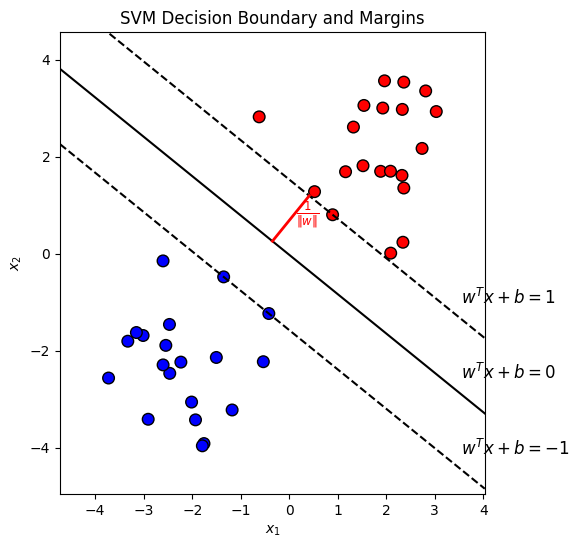

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Generate linearly separable data
np.random.seed(42)
X = np.r_[
    np.random.randn(20, 2) - [2, 2],
    np.random.randn(20, 2) + [2, 2]
]
y = np.array([0]*20 + [1]*20)

# 2. Train a linear SVM classifier (clf)
clf = SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Extract parameters w and b from the trained model
w = clf.coef_[0]      # [w1, w2]
b = clf.intercept_[0] # scalar bias

# 3. Create a grid of x-values for plotting the decision boundary and margins
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_plot = np.linspace(x_min, x_max, 200)

# Decision boundary: w^T x + b = 0 ==> x2 = -(w1*x1 + b)/w2
def line_y(x, offset=0.0):
    return -(w[0]*x + (b - offset)) / w[1]

y_decision = line_y(x_plot, offset=0)
y_margin_plus = line_y(x_plot, offset=1)   # w^T x + b = 1
y_margin_minus = line_y(x_plot, offset=-1) # w^T x + b = -1

# 4. Plot the data points
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=70)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(x_min, x_max)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.title('SVM Decision Boundary and Margins')

# Plot the decision boundary (solid line)
plt.plot(x_plot, y_decision, 'k-')
# Plot the margins (dashed lines)
plt.plot(x_plot, y_margin_plus, 'k--')
plt.plot(x_plot, y_margin_minus, 'k--')

# 5. Label the lines directly on the plot (instead of using a legend)
# Choose some x-value near the right side for placing text
x_text = x_max - 0.5
# Decision boundary label
y_text_decision = line_y(x_text, offset=0)
plt.text(x_text, y_text_decision + 0.3, r'$w^T x + b = 0$', fontsize=12)

# +1 margin label
y_text_plus = line_y(x_text, offset=1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = 1$', fontsize=12)

# -1 margin label
y_text_plus = line_y(x_text, offset=-1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = -1$', fontsize=12)

# 6. Draw and label the orthogonal distance 1/||w||
# Pick a point on the decision boundary in the middle of the plot
x_center = (x_min + x_max) / 2
y_center = line_y(x_center, offset=0)  # on the boundary
center_point = np.array([x_center, y_center])

# The direction normal to the boundary is parallel to w
w_norm = np.linalg.norm(w)
direction = w / w_norm

# One endpoint on the decision boundary, the other on the margin w^T x + b = 1
# The distance between them along w is 1 / ||w||
margin_point = center_point + (1 / w_norm) * direction

# Plot the orthogonal line segment
plt.plot([center_point[0], margin_point[0]],
         [center_point[1], margin_point[1]], 'r-', lw=2)

# Label the distance 1/||w|| near the midpoint of that segment
mid_point = (center_point + margin_point) / 2
plt.text(mid_point[0] + 0.1, mid_point[1], r'$\frac{1}{\|w\|}$', color='r', fontsize=12)


plt.gca().set_aspect('equal')   #make the plot exactly rectangular to keep orthogonal lines - well, orthogonal
plt.show()


# Support Vector Machines (SVMs) and Margin Boundaries for Non-Separable Case

------------------------

In **Support Vector Machines (SVMs)**, the non-separable case occurs when the data cannot be perfectly separated by a linear hyperplane. To handle this, **slack variables** (pl. *zmienne pomocnicze w kontekście SVM z miękkim marginesem, zmienne luzu*) are introduced, allowing some misclassifications while still aiming to find the best possible hyperplane that maximizes the margin.

The decision boundary is still given by:

$$ w^\top x + b = 0 $$

However, we now introduce **slack variables** $ \xi_i \geq 0 $ for each data point to allow some points to lie inside the margin or on the wrong side of the hyperplane.

## 1. The Role of Slack Variables

In the non-separable case, the constraints become:

$$ y_i (w^\top x_i + b) \geq 1 - \xi_i, \quad \forall i. $$

This means:

- If $ \xi_i = 0 $, the point is correctly classified and lies outside or exactly on the margin boundary.
- If $ 0 < \xi_i < 1 $, the point lies inside the margin but is still correctly classified.
- If $ \xi_i \geq 1 $, the point is misclassified.

The goal is to balance maximizing the margin and minimizing the total slack.

## 2. The Optimization Problem

The SVM optimization problem for the non-separable case is:

$$ \min_{w, b, \xi} \left( \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i \right) $$

subject to:

$$ y_i (w^\top x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i. $$

Here, $ C > 0 $ is a **regularization parameter** that controls the trade-off between maximizing the margin and minimizing the misclassification error:

- A **large $C$** emphasizes minimizing slack variables, leading to fewer misclassifications but possibly a smaller margin.
- A **small $C$** allows more misclassifications, potentially leading to a larger margin.

## 3. Soft Margin SVM

This approach is often referred to as a **Soft Margin SVM** (pl. *SVM z miękkim marginesem*), as it allows the decision boundary to be flexible, tolerating some violations of the margin constraints for better generalization.

The final decision function remains:

$$ f(x) = \text{sign}(w^\top x + b) $$

but it now reflects the balance between margin size and classification accuracy.

## 4. Geometrical Interpretation

- The **margin boundaries** are still defined by:

  $$ w^\top x + b = +1 \quad \text{and} \quad w^\top x + b = -1 $$

- However, some data points may now lie **inside the margin** or even on the wrong side of the hyperplane.
- The slack variables $ \xi_i $ quantify these violations, with larger values indicating more significant deviations.

## 5. Summary

- In the non-separable case, SVM introduces **slack variables** to allow some margin violations.
- The regularization parameter $C$ controls the balance between **margin maximization** and **classification error**.
- **Soft Margin SVM** enables the model to handle real-world data that is often noisy or not perfectly separable.

This approach provides a more robust solution that generalizes better to unseen data, especially in the presence of outliers or overlapping classes.



## Figure 12.1 (right) from *The Elements of Statistical Learning*

We shall reproduce Figure 12.1 (right - non-separable case) from *The Elements of Statistical Learning*

📚 **See also** → *The Elements of Statistical Learning*:  
Trevor Hastie, Robert Tibshirani, and Jerome Friedman, Springer, 2009.  
[📖 Link to the book](https://hastie.su.domains/ElemStatLearn/)
(Chapter 12, Figure 12.1)


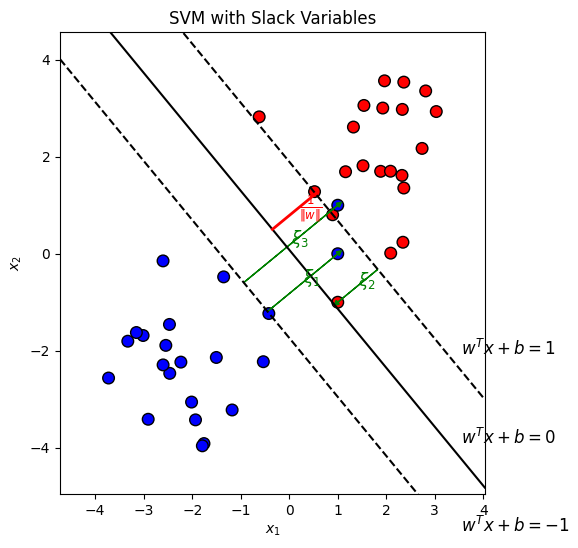

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Generate linearly separable data with 3 non-separable points
np.random.seed(42)
X = np.r_[
    np.random.randn(20, 2) - [2, 2],
    np.random.randn(20, 2) + [2, 2]
]
y = np.array([0]*20 + [1]*20)

# Add 3 non-separable points.
X = np.vstack([X, [[1, 0], [1, -1], [1, 1]]])
y = np.hstack([y, [0, 1, 0]])  # Assign classes

# 2. Train a linear SVM classifier (clf)
clf = SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Extract parameters w and b from the trained model
w = clf.coef_[0]      # [w1, w2]
b = clf.intercept_[0] # scalar bias

# 3. Create a grid of x-values for plotting the decision boundary and margins
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_plot = np.linspace(x_min, x_max, 200)

# Decision boundary: w^T x + b = 0 ==> x2 = -(w1*x1 + b)/w2
def line_y(x, offset=0.0):
    return -(w[0]*x + (b - offset)) / w[1]

y_decision = line_y(x_plot, offset=0)
y_margin_plus = line_y(x_plot, offset=1)   # w^T x + b = 1
y_margin_minus = line_y(x_plot, offset=-1) # w^T x + b = -1

# 4. Plot the data points
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=70)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(x_min, x_max)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.title('SVM with Slack Variables')

# Plot the decision boundary (solid line)
plt.plot(x_plot, y_decision, 'k-')
# Plot the margins (dashed lines)
plt.plot(x_plot, y_margin_plus, 'k--')
plt.plot(x_plot, y_margin_minus, 'k--')

# Label the decision boundary and margins
x_text = x_max - 0.5
y_text_decision = line_y(x_text, offset=0)
plt.text(x_text, y_text_decision + 0.3, r'$w^T x + b = 0$', fontsize=12)

y_text_plus = line_y(x_text, offset=1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = 1$', fontsize=12)

y_text_minus = line_y(x_text, offset=-1)
plt.text(x_text, y_text_minus + 0.3, r'$w^T x + b = -1$', fontsize=12)

# 5. Mark non-separable points with arrows and labels
non_separable_points = X[-3:]
labels = [r'$\xi_1$', r'$\xi_2$', r'$\xi_3$']

for i, (point, label) in enumerate(zip(non_separable_points, labels)):
    # Calculate projection onto margin
    margin_offset = 1 if y[-3:][i] == 1 else -1
    margin_point = point - ((w @ point + b - margin_offset) / np.dot(w, w)) * w

    # Draw arrow
    plt.arrow(margin_point[0], margin_point[1],
              point[0] - margin_point[0], point[1] - margin_point[1],
              head_width=0.1, head_length=0.1, fc='green', ec='green')

    # Label the slack variable
    mid_x = (point[0] + margin_point[0]) / 2
    mid_y = (point[1] + margin_point[1]) / 2
    plt.text(mid_x, mid_y, label, fontsize=12, color='green')

# 6. Draw and label the orthogonal distance 1/||w||
x_center = (x_min + x_max) / 2
y_center = line_y(x_center, offset=0)
center_point = np.array([x_center, y_center])

w_norm = np.linalg.norm(w)
direction = w / w_norm

margin_point = center_point + (1 / w_norm) * direction

plt.plot([center_point[0], margin_point[0]],
         [center_point[1], margin_point[1]], 'r-', lw=2)

mid_point = (center_point + margin_point) / 2
plt.text(mid_point[0] + 0.1, mid_point[1], r'$\frac{1}{\|w\|}$', color='r', fontsize=12)

plt.gca().set_aspect('equal')
plt.show()

## Task

Your task is to explain why, after we add the three candidate non-separable points (by uncommenting the two commented lines in the code below) we get a surprising, well separated chart.

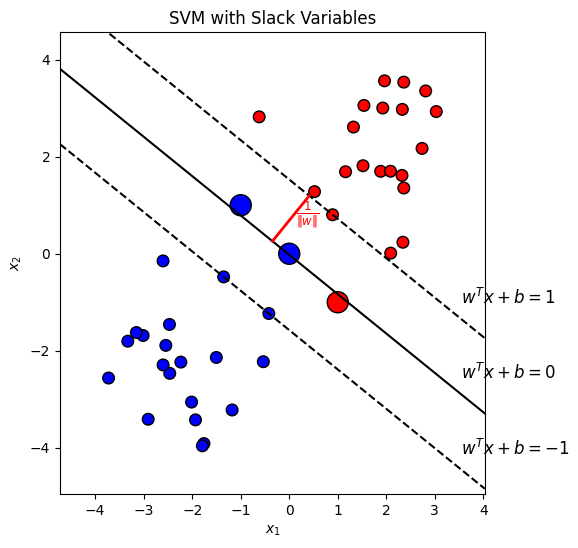

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Generate linearly separable data with 3 non-separable points
np.random.seed(42)
X = np.r_[
    np.random.randn(20, 2) - [2, 2],
    np.random.randn(20, 2) + [2, 2]
]
y = np.array([0]*20 + [1]*20)


# Mark 3 candidates non-separable points, DO NOT add them to the classifier yet
X1 = np.vstack([[[0, 0], [1, -1], [-1, 1]]])
y1 = np.hstack([[0, 1, 0]])  # Assign classes
plt.figure(figsize=(6, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='bwr', edgecolors='k', s=230)

####################### TWO LINES TO UNCOMMENT ########################
############ THEY ADD THE 3 POINTS TO THE CLASSIFIER DATA #############

#X = np.vstack([X, X1])
#y = np.hstack([y, y1])  # Assign classes

#######################################################################




# 2. Train a linear SVM classifier (clf)
clf = SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Extract parameters w and b from the trained model
w = clf.coef_[0]      # [w1, w2]
b = clf.intercept_[0] # scalar bias

# 3. Create a grid of x-values for plotting the decision boundary and margins
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_plot = np.linspace(x_min, x_max, 200)

# Decision boundary: w^T x + b = 0 ==> x2 = -(w1*x1 + b)/w2
def line_y(x, offset=0.0):
    return -(w[0]*x + (b - offset)) / w[1]

y_decision = line_y(x_plot, offset=0)
y_margin_plus = line_y(x_plot, offset=1)   # w^T x + b = 1
y_margin_minus = line_y(x_plot, offset=-1) # w^T x + b = -1

# 4. Plot the data points

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=70)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(x_min, x_max)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.title('SVM with Slack Variables')

# Plot the decision boundary (solid line)
plt.plot(x_plot, y_decision, 'k-')
# Plot the margins (dashed lines)
plt.plot(x_plot, y_margin_plus, 'k--')
plt.plot(x_plot, y_margin_minus, 'k--')

# Label the decision boundary and margins
x_text = x_max - 0.5
y_text_decision = line_y(x_text, offset=0)
plt.text(x_text, y_text_decision + 0.3, r'$w^T x + b = 0$', fontsize=12)

y_text_plus = line_y(x_text, offset=1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = 1$', fontsize=12)

y_text_minus = line_y(x_text, offset=-1)
plt.text(x_text, y_text_minus + 0.3, r'$w^T x + b = -1$', fontsize=12)

# 6. Draw and label the orthogonal distance 1/||w||
x_center = (x_min + x_max) / 2
y_center = line_y(x_center, offset=0)
center_point = np.array([x_center, y_center])

w_norm = np.linalg.norm(w)
direction = w / w_norm

margin_point = center_point + (1 / w_norm) * direction

plt.plot([center_point[0], margin_point[0]],
         [center_point[1], margin_point[1]], 'r-', lw=2)

mid_point = (center_point + margin_point) / 2
plt.text(mid_point[0] + 0.1, mid_point[1], r'$\frac{1}{\|w\|}$', color='r', fontsize=12)

plt.gca().set_aspect('equal')
plt.show()
